# Creating a realistic recording site from a rat cortex column

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pprint
np.set_printoptions(suppress=True)
from scipy.interpolate import interp1d
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.patches import Circle
import math
from scipy.spatial.distance import squareform, pdist
from scipy.spatial import cKDTree
import pandas as pd
from collections import namedtuple

Channel = namedtuple("Channel", ["id", "pos", "type"])
Neuron = namedtuple("Neuron", ["id", "pos", "type", "layer"])
Layer = namedtuple("Layer", ["id", "name", "height", "volume", "total_count", "total_density", "in_ratio", 
                             "layer_density_distributions"])

## 1.  Building and visualizing a rat Somatosensory cortex column object

In [2]:
from CortexColumn import Column, createRatSomatosensoryCortexDataDict

#Random seed for reproducibility
np.random.seed(0)

#Import rat somatosensory cortex column dict from the Helmstaedter papers
rat_somatosensory_cortex_data_dict = createRatSomatosensoryCortexDataDict()

#Create new column using the given cortex dict and with min distance (microns) enforced between neurons
column = Column(rat_somatosensory_cortex_data_dict, min_neuron_dist=15)

Building density/depth distributions...
... distributions built!
Building layers...
... layers built!
Filling layers with neurons...
Filling layer L1
Filling layer L2
Filling layer L3
Filling layer L4
Filling layer L5A
Filling layer L5B
Filling layer L6A
Filling layer L6B
... all layers filled!


In [3]:
#Layer information is stored in a layer DataFrame

print(column.getLayers())

   id region      height    volume  total_count  total_density   in_ratio  \
0   0     L1  112.351160  0.014363    55.578350       7.018358  75.866035   
1   1     L2  218.058757  0.025283  1931.497070     111.821252  16.165011   
2   2     L3  406.067978  0.035968  5087.141561      92.146623  10.353320   
3   3     L4  293.340878  0.036720  4584.436721     124.188279   7.948849   
4   4    L5A  248.005502  0.034053  1522.621969      53.632546  11.778734   
5   5    L5B  273.848643  0.037334  2320.579184      65.624561  16.528333   
6   6    L6A  281.431720  0.041444  3895.807924      92.640346   9.982142   
7   7    L6B  200.201415  0.025243   631.991731      47.583563   8.167604   

                         layer_density_distributions  
0  <scipy.stats._distn_infrastructure.rv_sample o...  
1  <scipy.stats._distn_infrastructure.rv_sample o...  
2  <scipy.stats._distn_infrastructure.rv_sample o...  
3  <scipy.stats._distn_infrastructure.rv_sample o...  
4  <scipy.stats._distn_infrastr

In [4]:
#Neuron information is stored in a neuron DataFrame

print(column.getNeurons())

          id                                                pos type layer
0          0  [-2.632854647202845, 96.16180992892492, 92.059...   IN    L1
1          1  [55.86312776810693, -30.947925875339664, 27.68...   IN    L1
2          2  [-60.80622346190011, -53.9890303316604, 110.75...   IN    L1
3          3  [89.60243528004308, 10.47489217634793, 21.4906...   IN    L1
4          4  [-165.1954296395088, -92.54507480699985, 44.38...   IN    L1
5          5  [-87.35205164674575, -125.4601044055182, 42.78...   IN    L1
6          6  [-37.259353421008434, -106.29879584294079, 41....   IN    L1
7          7  [-147.08768093297476, -127.986467710426, 80.86...   IN    L1
8          8  [91.10880844006387, -27.87276565752045, 80.365...   IN    L1
9          9  [-121.87873357179033, -155.08327457579634, 49....   IN    L1
10        10  [-40.838265762995675, 158.73317107041444, 37.6...   IN    L1
11        11  [-13.914460131866798, 16.82441370387366, 31.58...   IN    L1
12        12  [29.3122020

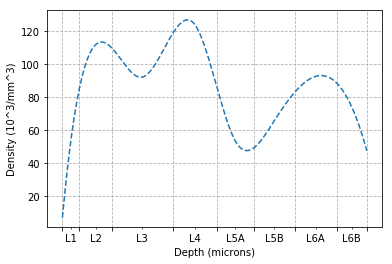

In [5]:
#Plot the density vs. depth distribution from which neurons were sampled

column.plotDensityDistribution()

Layer: L2
Radius: 192.111592354
Height: 218.05875718323063
Total Neurons: 1931
IN Neurons: 312
EX Neurons: 1619


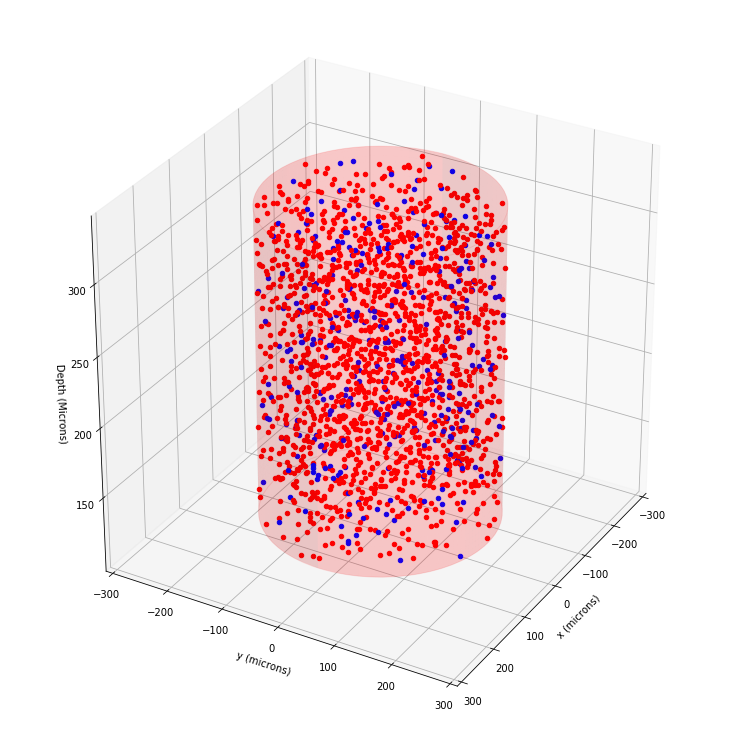

In [6]:
#Plot a layer from the cortex column
layer_id = 1
fig= plt.figure(figsize=(10,10))
ax = Axes3D(fig, azim=30, elev=30)

column.plotLayer(layer_id, ax=ax)

Layers: ['L1', 'L2', 'L3', 'L4', 'L5A', 'L5B', 'L6A', 'L6B']
Radii: [201.72334005016893, 192.1115923542481, 167.91237276595814, 199.61418265659364, 209.06052994719468, 208.3148040681305, 216.50536213593296, 200.33876276009667]
Heights: [112.35115980299935, 218.05875718323063, 406.06797829354247, 293.3408775072779, 248.0055022928528, 273.8486427917023, 281.4317202823482, 200.20141468040944]


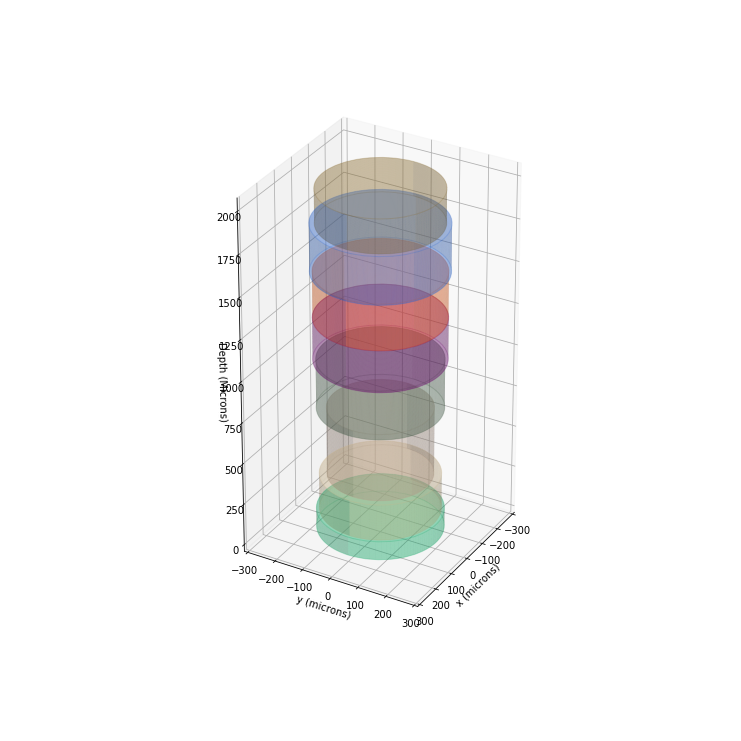

In [7]:
#Plot the entire column without any neurons to see the layer shapes
fig=plt.figure(figsize=(10,10))
ax = Axes3D(fig, azim=30, elev=30)

column.plotColumn(plot_neurons=False, ax=ax)

Layers: ['L1', 'L2', 'L3', 'L4', 'L5A', 'L5B', 'L6A', 'L6B']
Radii: [201.72334005016893, 192.1115923542481, 167.91237276595814, 199.61418265659364, 209.06052994719468, 208.3148040681305, 216.50536213593296, 200.33876276009667]
Heights: [112.35115980299935, 218.05875718323063, 406.06797829354247, 293.3408775072779, 248.0055022928528, 273.8486427917023, 281.4317202823482, 200.20141468040944]
Total Neurons: {'L6B': 632, 'L5B': 2321, 'L5A': 1523, 'L4': 4584, 'L2': 1931, 'L3': 5087, 'L1': 56, 'L6A': 3896}
IN Neurons: {'L6B': 52, 'L5B': 384, 'L5A': 179, 'L4': 364, 'L2': 312, 'L3': 527, 'L1': 42, 'L6A': 389}
EX Neurons: {'L6B': 580, 'L5B': 1937, 'L5A': 1344, 'L4': 4220, 'L2': 1619, 'L3': 4560, 'L1': 14, 'L6A': 3507}


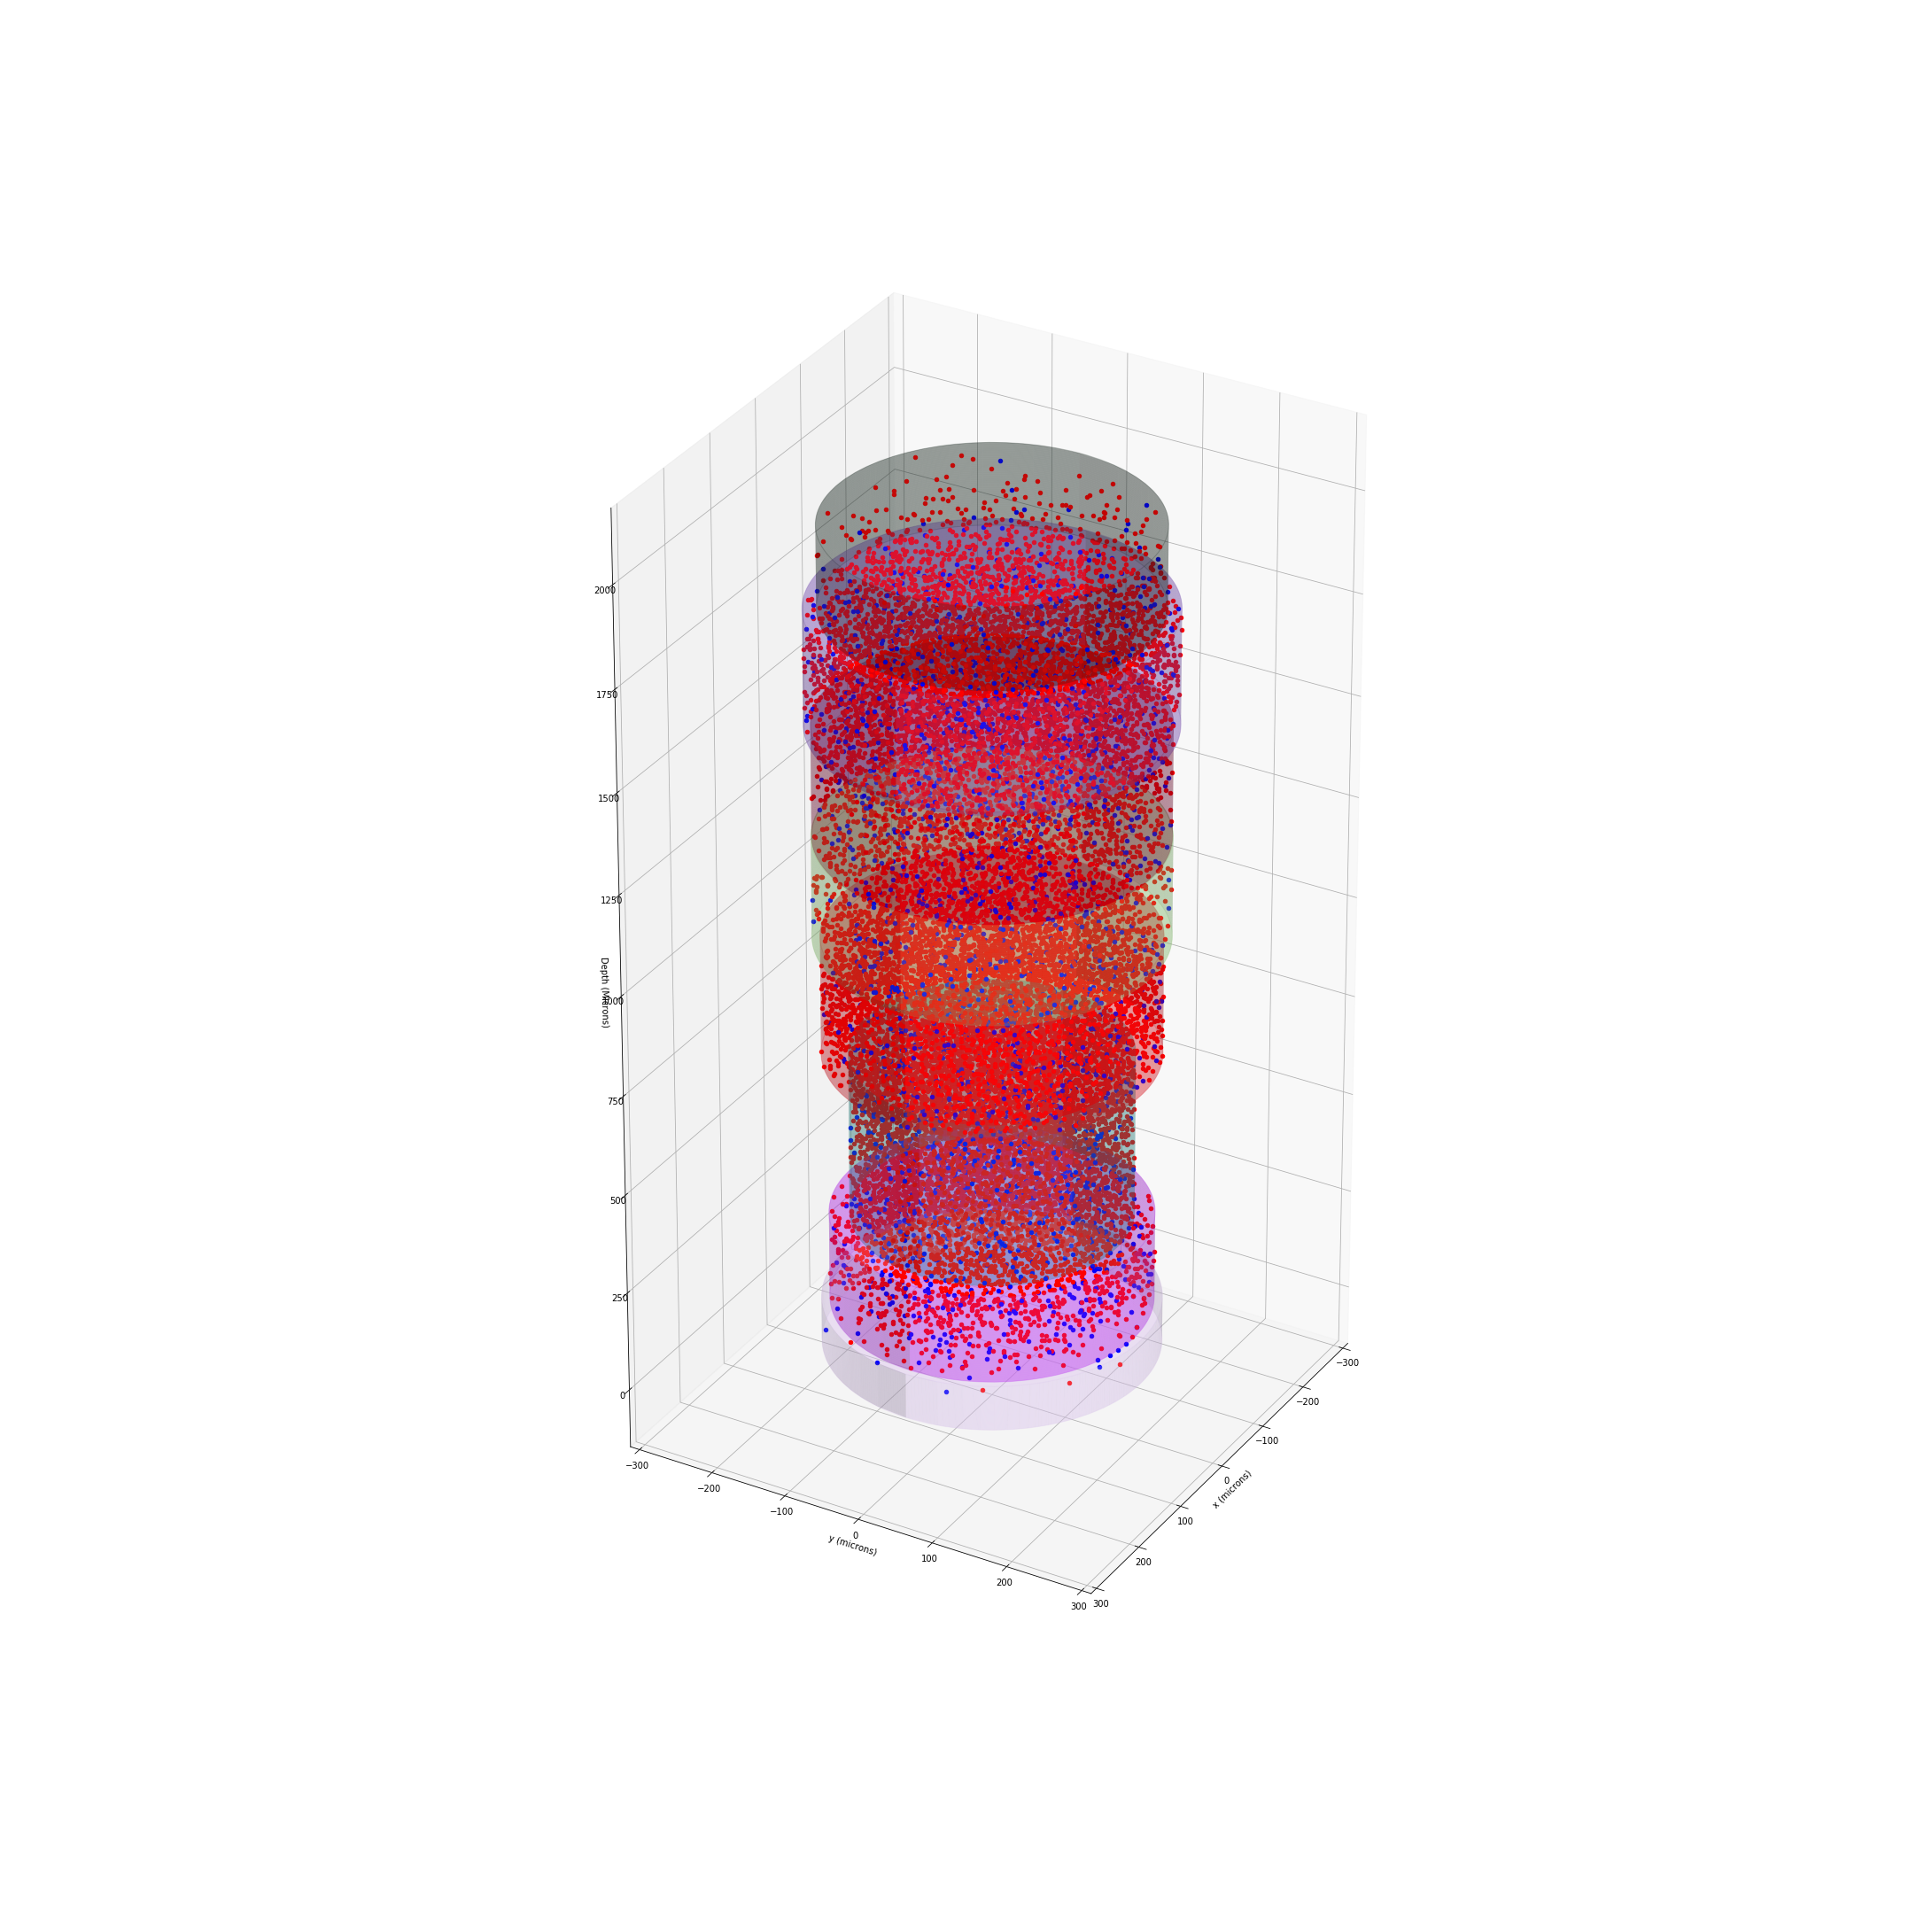

In [8]:
#Can plot the entire column with all neurons included (pretty slow, lots of neurons to be scattered)
fig=plt.figure(figsize=(30,30))
ax = Axes3D(fig, azim=30, elev=30)

column.plotColumn(plot_neurons=True, ax=ax)

## 2. Creating and using a Probe object (Neuropixels subclass)

Layers: ['L1', 'L2', 'L3', 'L4', 'L5A', 'L5B', 'L6A', 'L6B']
Radii: [201.72334005016893, 192.1115923542481, 167.91237276595814, 199.61418265659364, 209.06052994719468, 208.3148040681305, 216.50536213593296, 200.33876276009667]
Heights: [112.35115980299935, 218.05875718323063, 406.06797829354247, 293.3408775072779, 248.0055022928528, 273.8486427917023, 281.4317202823482, 200.20141468040944]


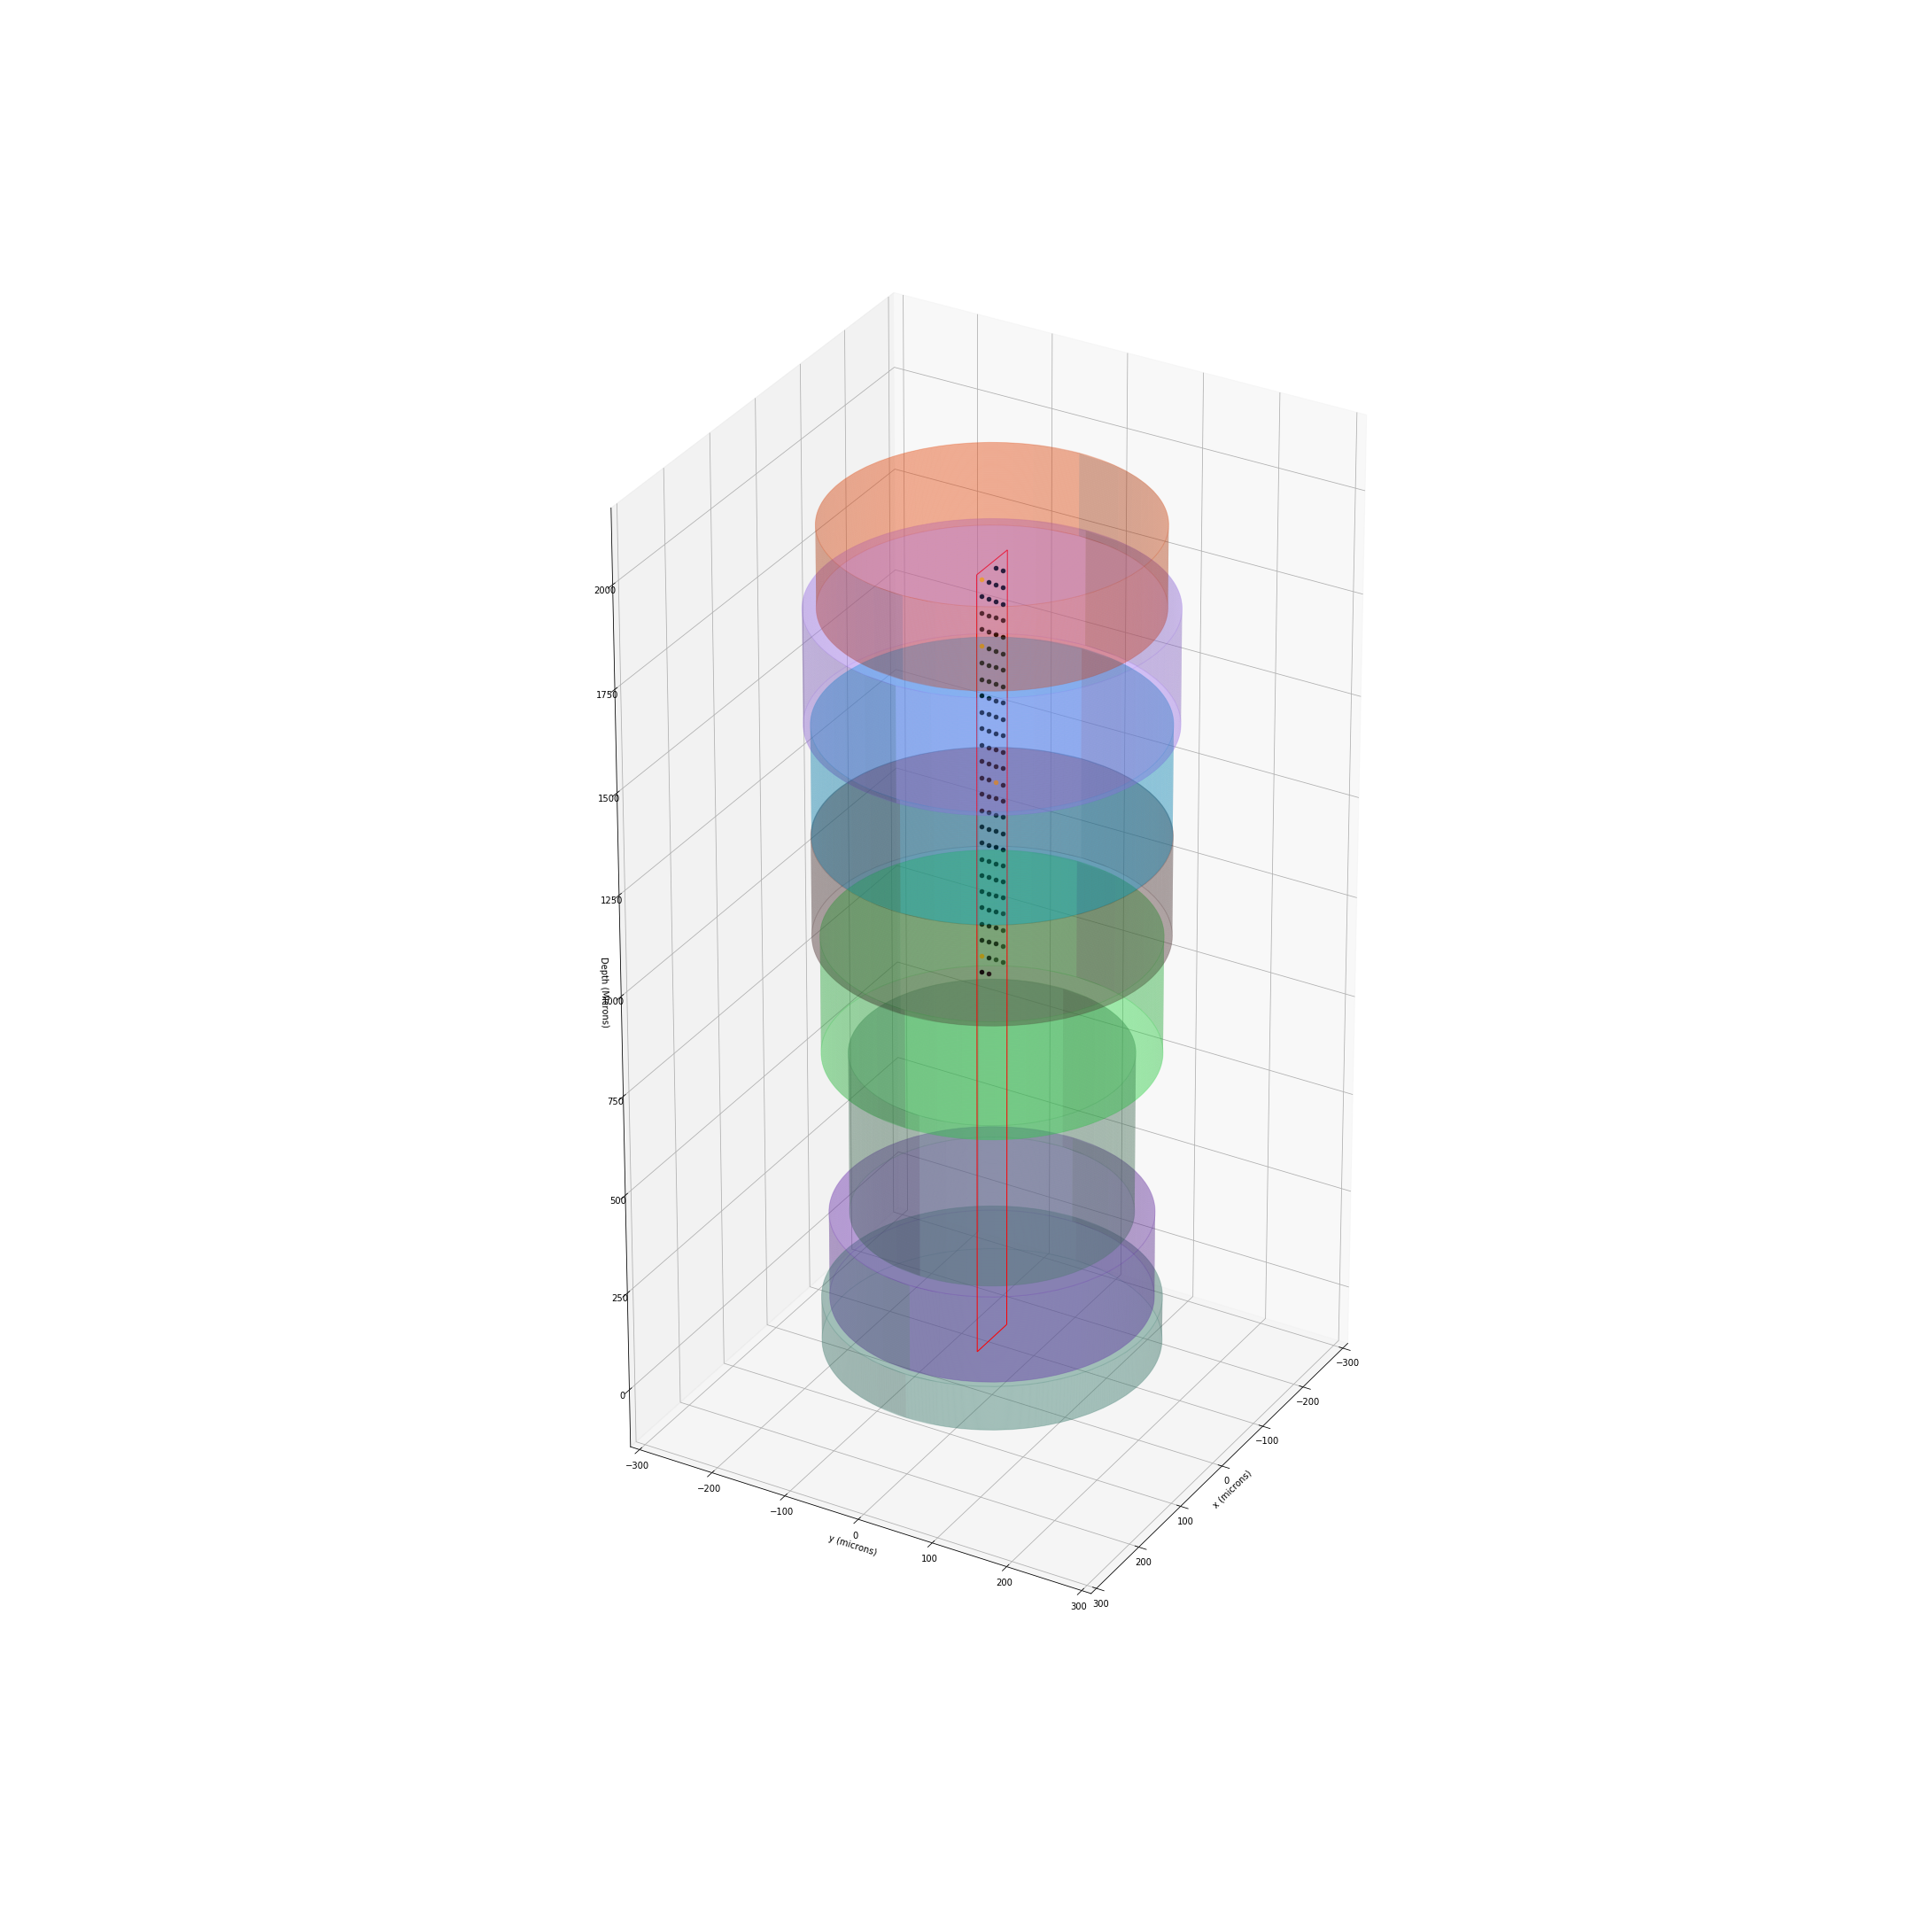

In [9]:
fig=plt.figure(figsize=(30,30))
ax = Axes3D(fig, azim=30, elev=30)

#Create a probe object that stores channel information
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('Probe.py'))))
from Probe import NeuroPixel, NeuralProbe
probe = NeuroPixel(num_channels = 192)

#Draw the probe, black channels are recording, orange channels are reference (can exclude channel ids from drawing)
probe.draw(ax=ax, excluded_channel_ids=range(92))

#Plot the layers of the column to see how the probe interacts with the cortical region
column.plotColumn(plot_neurons=False, ax=ax)

Layers: ['L1', 'L2', 'L3', 'L4', 'L5A', 'L5B', 'L6A', 'L6B']
Radii: [201.72334005016893, 192.1115923542481, 167.91237276595814, 199.61418265659364, 209.06052994719468, 208.3148040681305, 216.50536213593296, 200.33876276009667]
Heights: [112.35115980299935, 218.05875718323063, 406.06797829354247, 293.3408775072779, 248.0055022928528, 273.8486427917023, 281.4317202823482, 200.20141468040944]


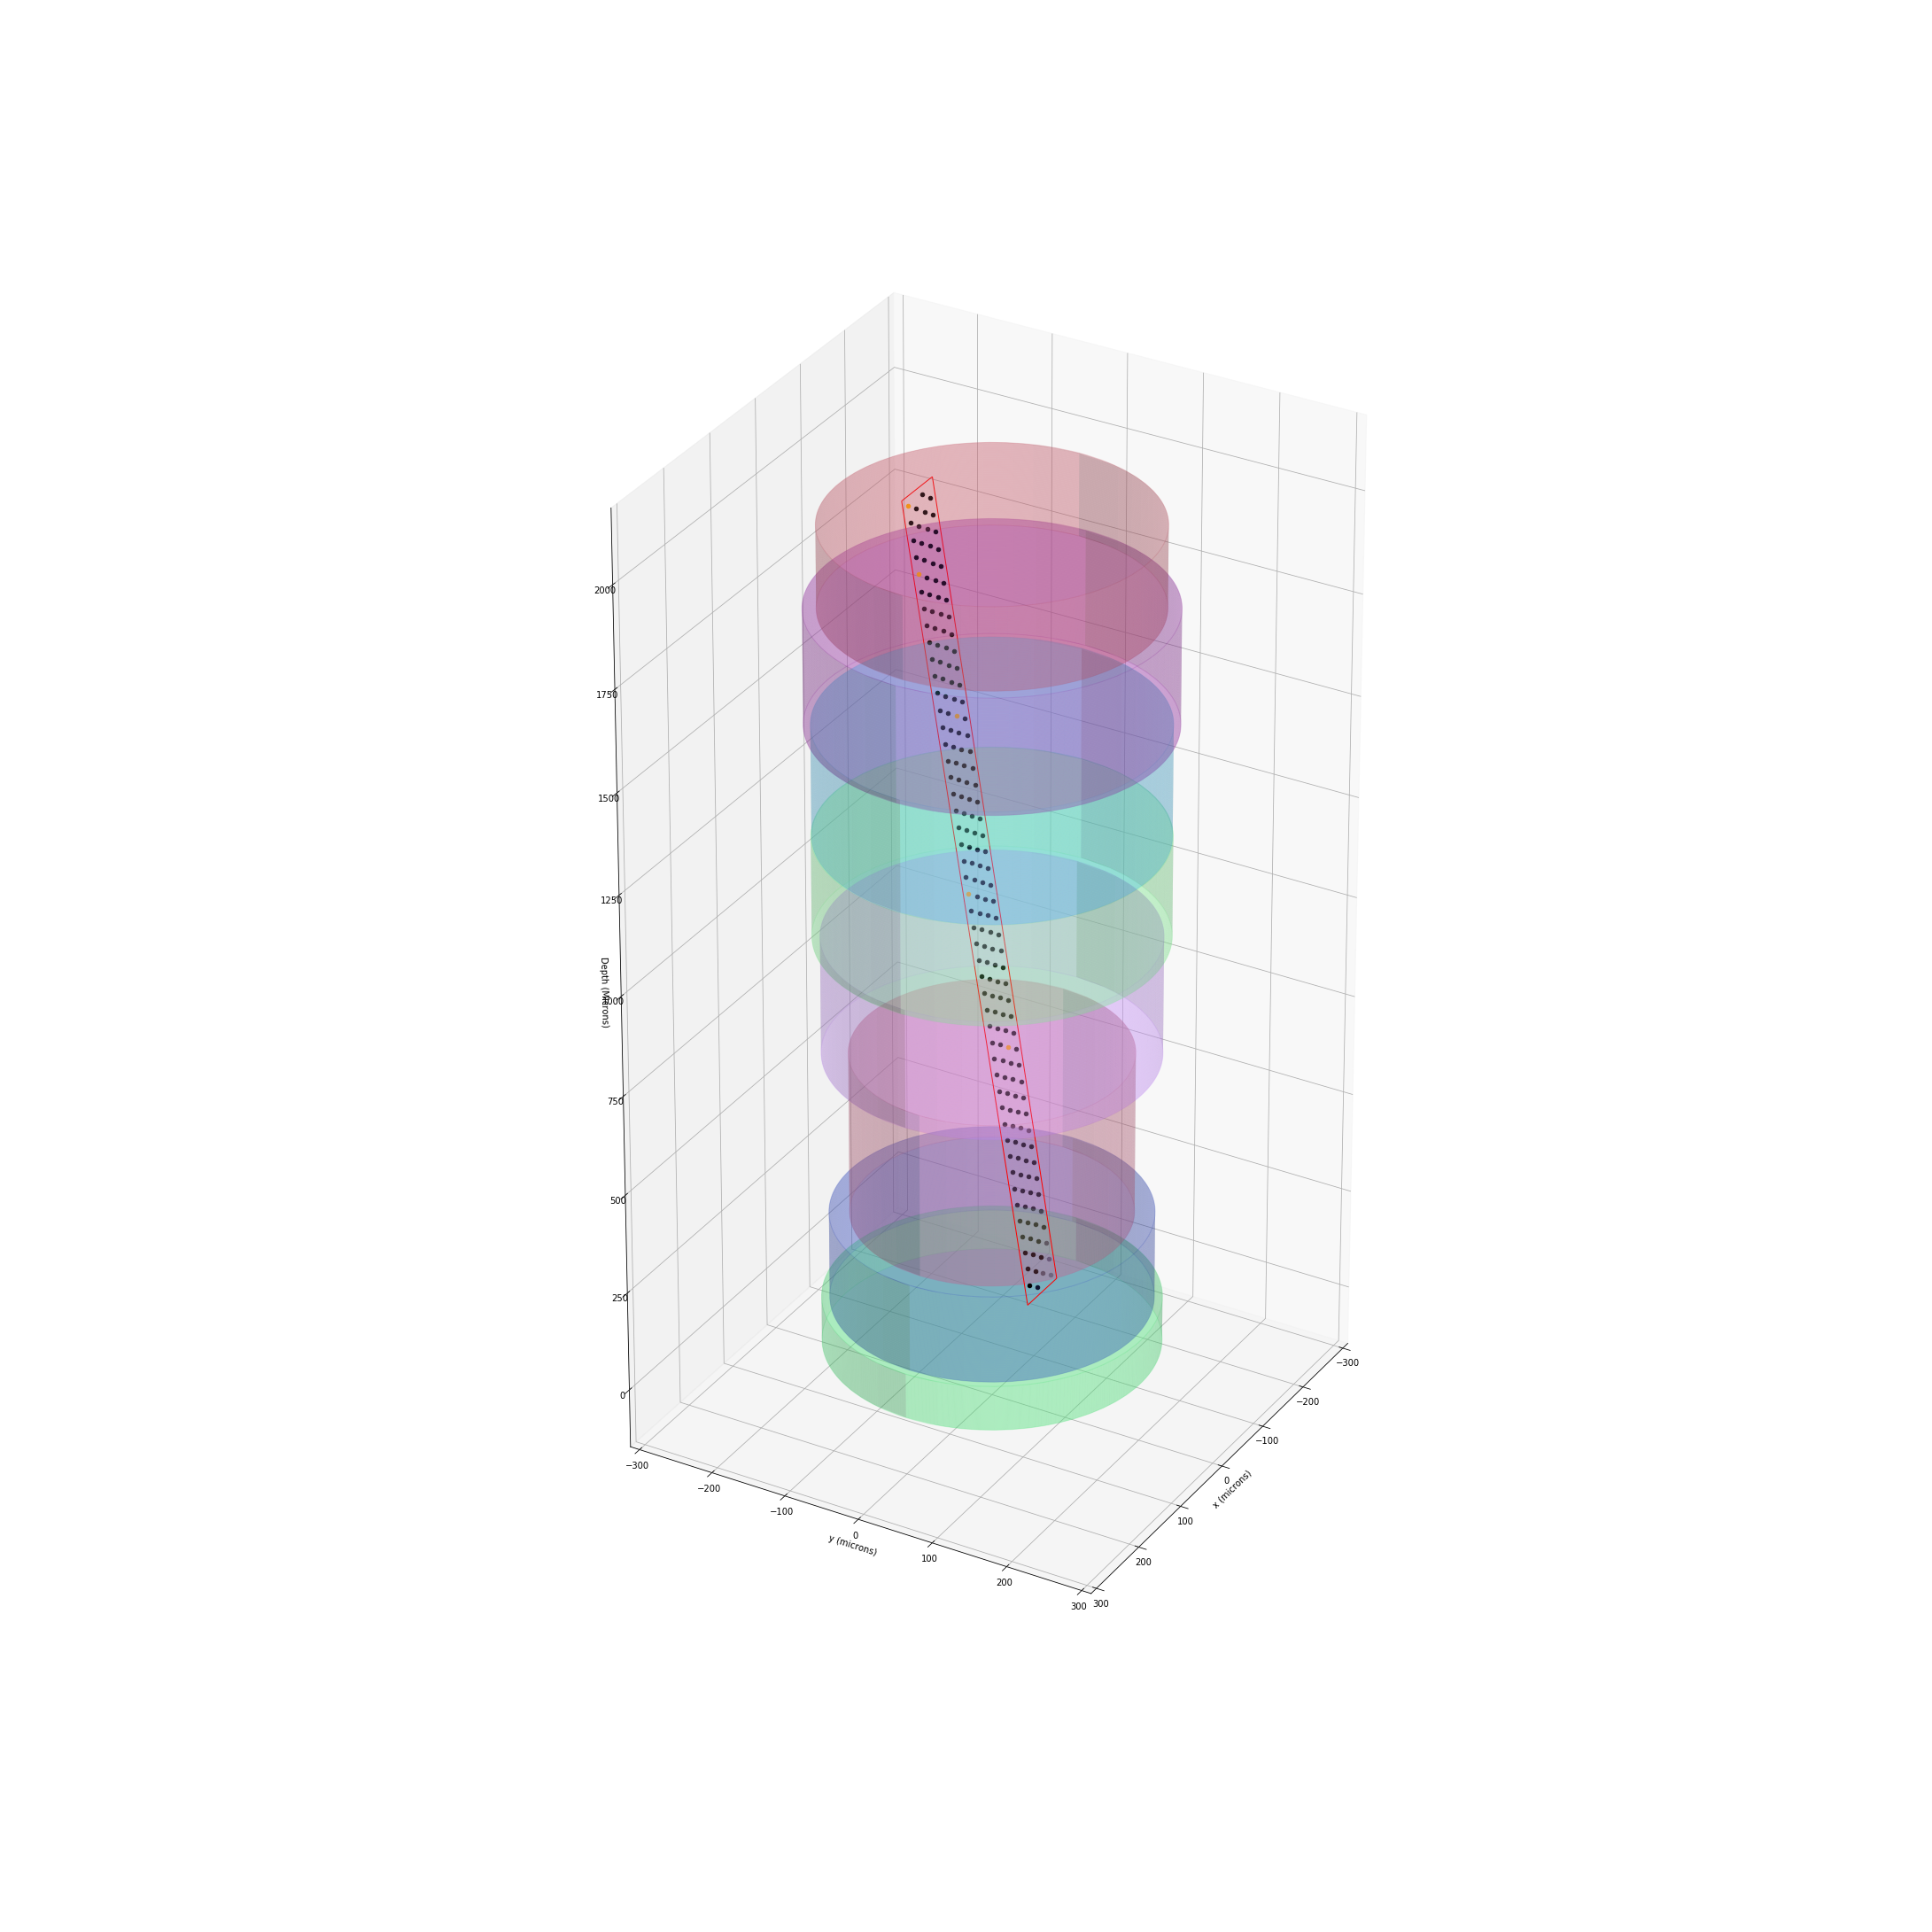

In [10]:
fig=plt.figure(figsize=(30,30))
ax = Axes3D(fig, azim=30, elev=30)

#rotate the probe around the given axis counterclockwise with a given angle (radians). Plotting is optional
axis = np.asarray([1, 0, 0])
theta = math.pi/36 #radians
probe.rotate(theta, axis, ax=ax, plot=False)

#shift the probe in the direction of a given axis with a given distance. Plotting is optional
axis = np.asarray([1, 0, 0])
dist = -120 #microns
probe.shift(dist, axis, ax=ax, plot=True)


column.plotColumn(plot_neurons=False, ax=ax)

Num neurons: 1403
Layers: ['L1', 'L2', 'L3', 'L4', 'L5A', 'L5B', 'L6A', 'L6B']
Radii: [201.72334005016893, 192.1115923542481, 167.91237276595814, 199.61418265659364, 209.06052994719468, 208.3148040681305, 216.50536213593296, 200.33876276009667]
Heights: [112.35115980299935, 218.05875718323063, 406.06797829354247, 293.3408775072779, 248.0055022928528, 273.8486427917023, 281.4317202823482, 200.20141468040944]
Total Neurons: {'L6B': 40, 'L5B': 301, 'L5A': 249, 'L4': 362, 'L2': 0, 'L3': 0, 'L1': 0, 'L6A': 451}
IN Neurons: {'L6B': 1, 'L5B': 61, 'L5A': 40, 'L4': 27, 'L2': 0, 'L3': 0, 'L1': 0, 'L6A': 45}
EX Neurons: {'L6B': 39, 'L5B': 240, 'L5A': 209, 'L4': 335, 'L2': 0, 'L3': 0, 'L1': 0, 'L6A': 406}


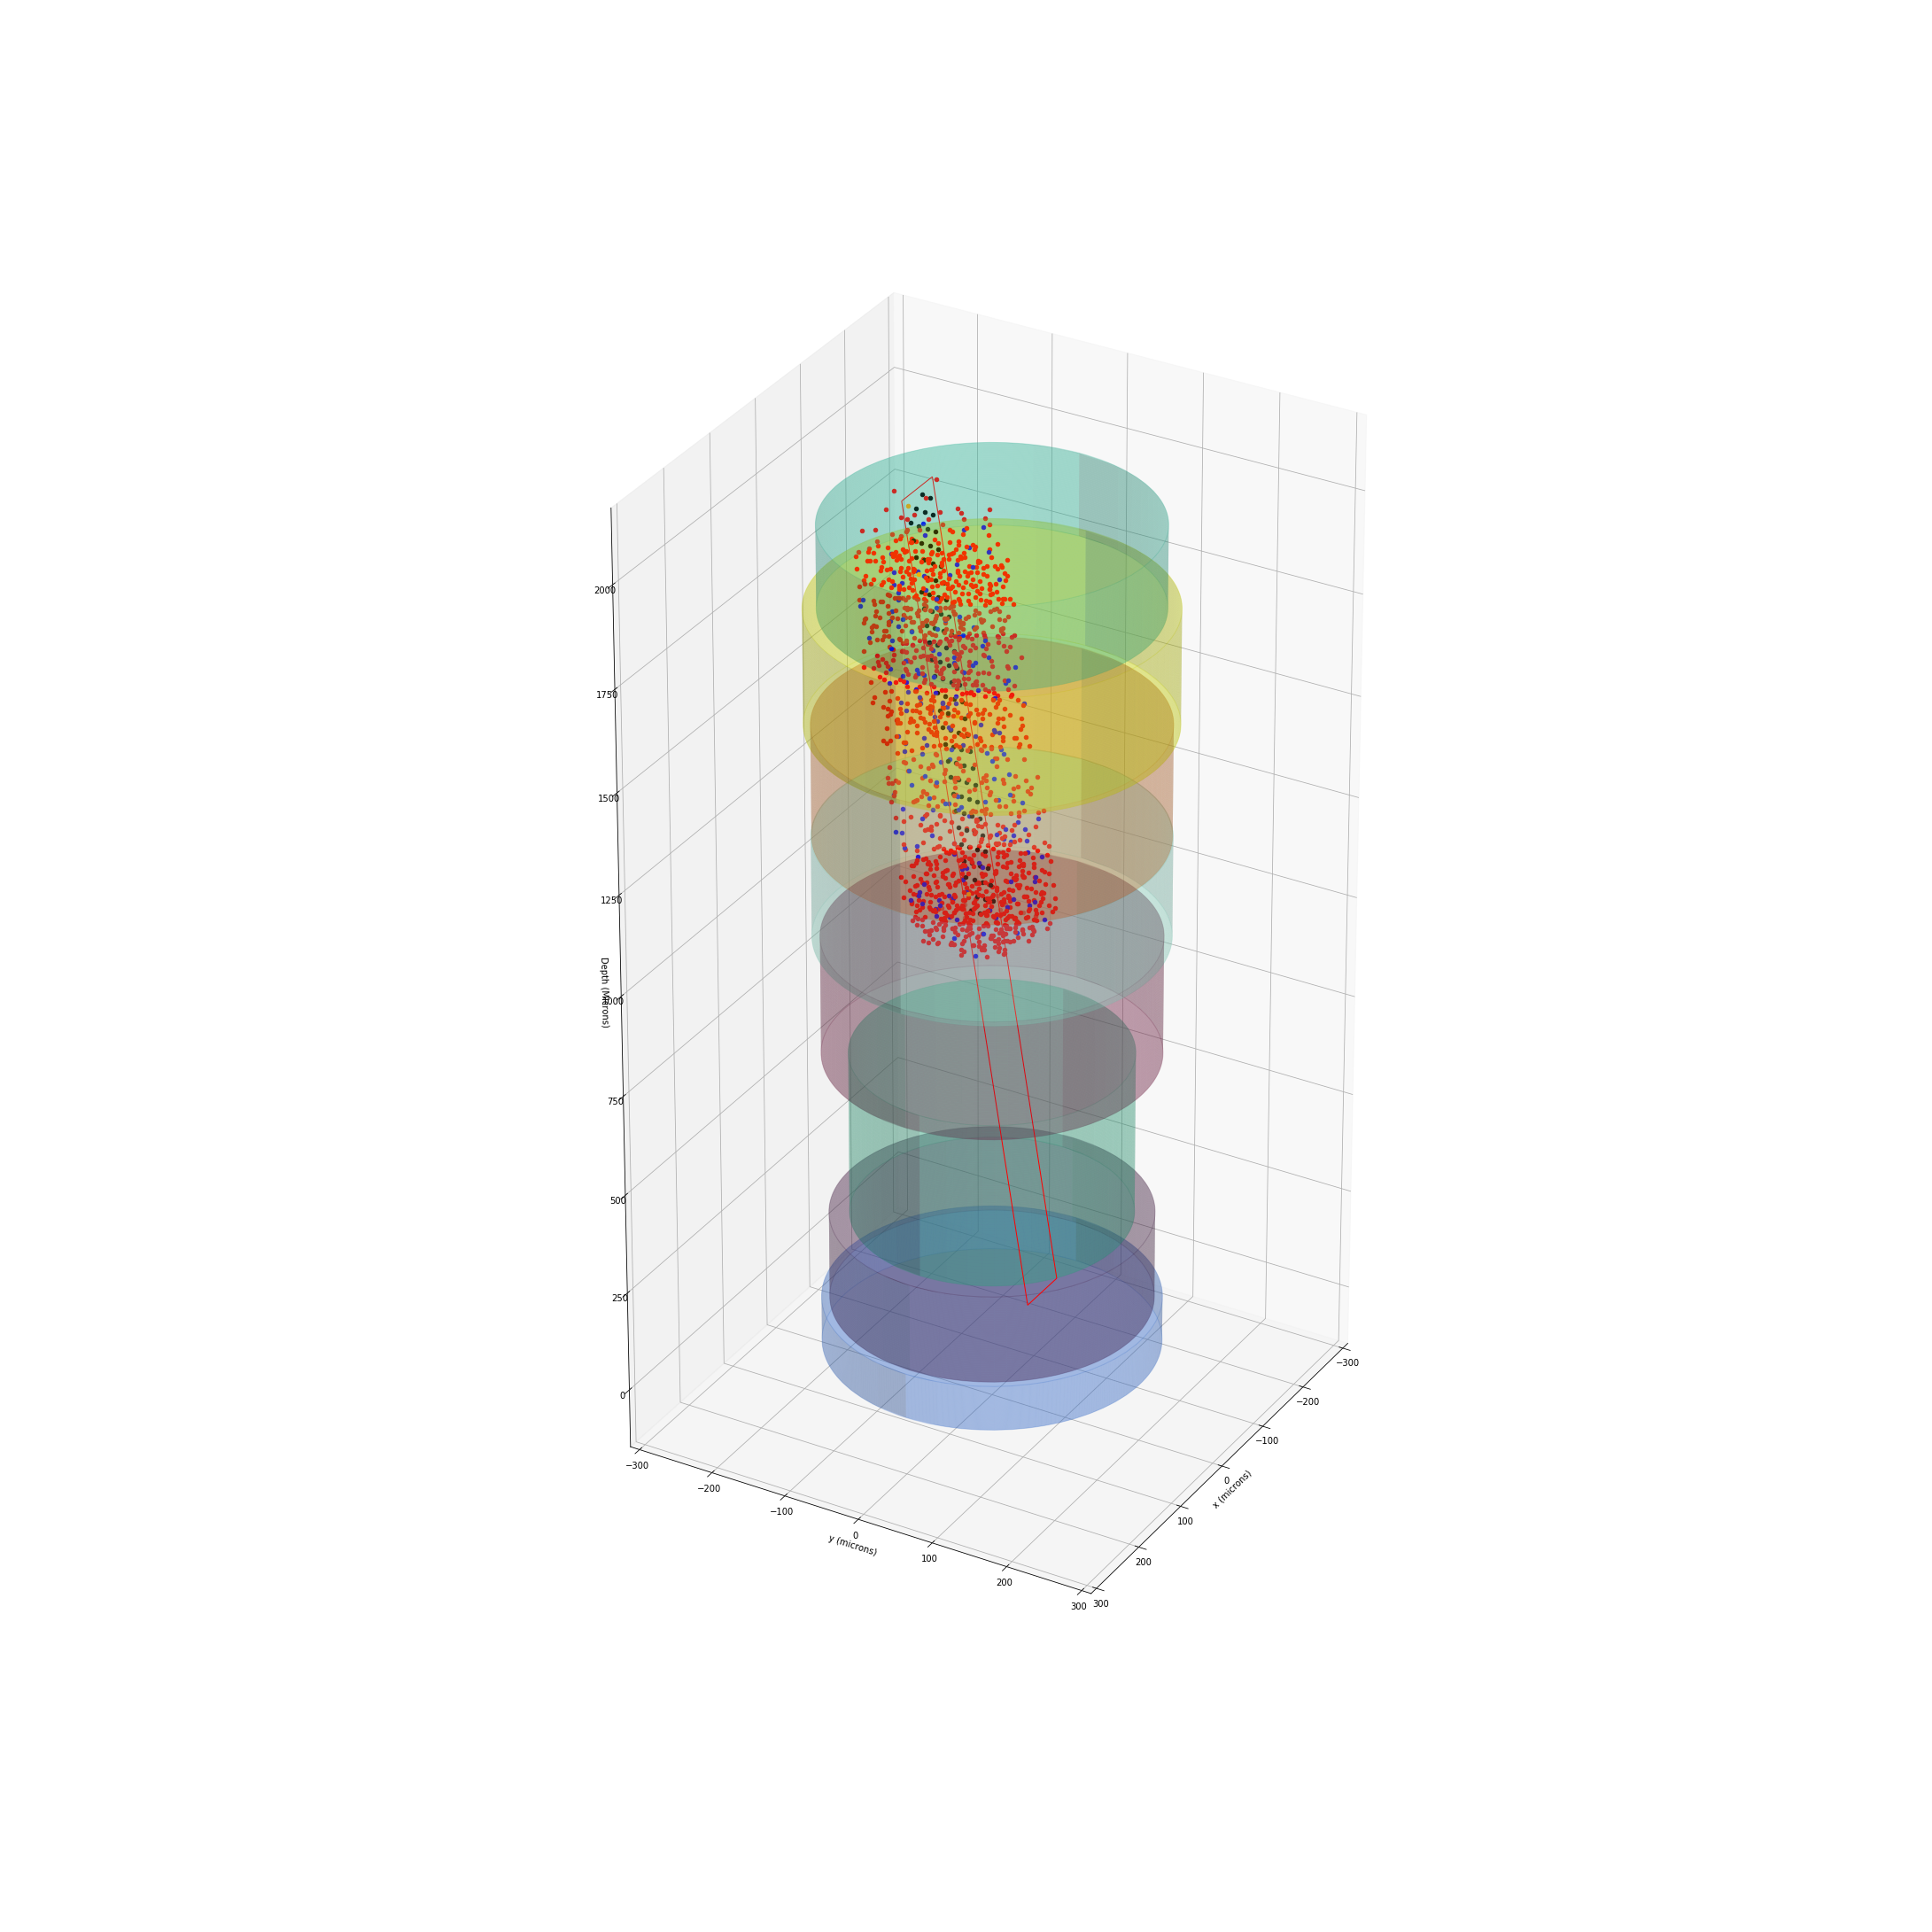

In [11]:
#Get all neurons within a radius of any channel on the array (can exclude channels)
close_neuron_df = probe.getNeuronsRadius(column.getNeurons(), radius=80.0, excluded_channel_ids=range(92))
print("Num neurons: " + str(close_neuron_df.shape[0]))
#Can plot the column with all neurons in the radius
fig=plt.figure(figsize=(30,30))
ax = Axes3D(fig, azim=30, elev=30)
probe.draw(ax, excluded_channel_ids=range(92))

column.plotColumn(close_neuron_df, plot_neurons=True, ax=ax)

## 3. All data structures needed for simulating an extracellular recording

In [12]:
#All neurons for the recording
print(close_neuron_df)

#Can get all neuron positions in numpy array
close_neuron_pos = np.asarray(list(close_neuron_df['pos'].copy()))
print(close_neuron_pos.shape)


#All channels on the probe (you will need to manually exclude channel ids that you excluded earlier)
probe_channels = probe.getChannels()
print(probe_channels)

#Can get all channel positions in numpy array
close_channels_pos = np.asarray(list(probe.getChannels()['pos'].copy()))
print(close_channels_pos.shape)

          id                                                pos type layer
8196    8196  [-146.4320576290065, -72.89342881618774, 868.3...   EX    L4
16391  16391  [-93.66810027028053, -106.31660884554276, 1687...   EX   L6A
8200    8200  [-141.10861994527392, -38.549646153487835, 974...   EX    L4
16402  16402  [-54.81551839140744, -135.0681237962447, 1809....   EX   L6A
8224    8224  [-181.1331385053742, -68.17870525636354, 997.2...   EX    L4
8225    8225  [-149.21265765560722, -9.73817868650865, 959.7...   EX    L4
16427  16427  [-39.14174304087686, -134.22929952311637, 1757...   EX   L6A
8242    8242  [-148.77532206665217, -63.40767890151715, 971....   EX    L4
8246    8246  [-51.871019772029165, -139.0384665086151, 985....   EX    L4
8249    8249  [-121.62206481698317, -51.20772673766435, 911....   EX    L4
16442  16442  [-148.16679220399402, -155.87038096749183, 164...   EX   L6A
16454  16454  [-52.87558349039288, -99.5723693811408, 1653.9...   EX   L6A
16475  16475  [-109.47526